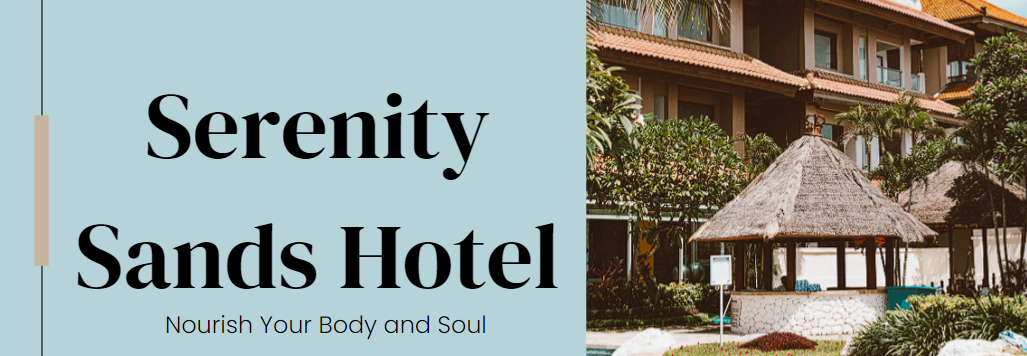

**Introducción**

Podemos identificar de entrada que la intención de este analisis es verificar la concurrecia de huespedes, de donde nos visitan, cuanto tiempo tienen de estadia en nuestras istalaciones, cuales de nuestros servicios son los mas utilizados, el mismo se empleara para conocer mejor a nuestros visitantes, las temporadas altas y bajas, ademas de las posibles ganancias a traves de las reservas realizadas.

**Preguntas:**

*   ¿Cuál es la distribución de la duración de las estadías en el hotel?
*   ¿Cuáles son los tipos de habitaciones más populares entre los huéspedes?
*   ¿Existe una relación entre la duración de la estadía y el tipo de habitación reservada?
*   ¿Qué porcentaje de huéspedes solicita servicios adicionales como desayuno, paquete de spa o recogida en el aeropuerto?
*   ¿Cuál es la distribución de edades de los huéspedes y cómo se relaciona con la duración de la estadía o los servicios solicitados?
*   ¿Hay alguna tendencia temporal en las reservas, como picos en ciertas épocas del año?

**Hipótesis:**

*   La duración media de la estadía en habitaciones de lujo es mayor que en habitaciones estándar.
*   Los huéspedes que solicitan el paquete de spa tienden a quedarse más tiempo en el hotel.
*   Existe una correlación positiva entre la edad de los huéspedes y la probabilidad de solicitar servicios adicionales.
*   Las reservas realizadas durante los meses de verano tienen una duración media más larga que las realizadas en otros períodos del año.
*   Los huéspedes de ciertas nacionalidades pueden tener preferencias distintas en cuanto a tipos de habitaciones o servicios adicionales.

In [1]:
#Importamos las librerias principales para iniciar
import pandas as pd
import numpy as np

In [2]:
#Sumamos el dataset para visualizavión y analisis
Serenity_sands=pd.read_excel("Hotel Reservations Data.xlsx")
Serenity_sands

,Reservation ID,Guest ID,First Name,Last Name,Gender,Email,Phone,Nationality,Birthdate,Address,...,Payment Status,Special Requests,Reservation Source,Booking Date,Check-in Time,Check-out Time,Breakfast Included,Spa Package Included,Airport Pickup Included,Room Type Rate
0,1001,101,Laura,Weiss,Male,xconley@example.org,+1-777-290-9299x1874,Sweden,1990-06-20,194 Stewart Squares,...,Paid,They operation listen office no authority last...,Walk-in,2022-05-26,01:13:28,19:11:56,Yes,No,No,233
1,1002,102,Austin,Henderson,Female,williamaustin@example.org,4268908795,Cyprus,1999-07-22,31442 Morris Port Apt. 423,...,Pending,Agreement every land car.,Phone,2022-11-27,16:05:00,21:09:16,No,Yes,Yes,132
2,1003,103,Jamie,Smith,Male,benjaminporter@example.com,+1-563-234-8041x0677,Italy,1978-09-16,851 Ashley Junctions Apt. 370,...,Paid,Say exactly total field American.,Website,2022-07-22,18:54:33,23:34:07,No,Yes,No,88
3,1004,104,Brian,Erickson,Male,johnmelton@example.org,+1-377-838-9030x072,Slovakia,1958-02-21,7221 Lewis Burg,...,Pending,Operation better present effort teacher huge end.,Walk-in,2022-01-22,13:48:30,09:00:01,No,Yes,Yes,227
4,1005,105,Cristian,Taylor,Male,salazarkelly@example.com,5043212352,Norway,1984-11-30,9874 Melanie Ford Suite 715,...,Pending,Board little they really office.,Booking Platform,2022-06-15,15:32:38,23:48:24,Yes,No,Yes,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,37028,36128,Sean,Bowen,Female,newmansophia@example.org,001-271-583-7480x5708,Czech Republic,2004-06-10,0406 Carrie Extension Apt. 326,...,Paid,Sea onto thought affect think kid man site.,Website,2023-09-01,22:32:51,00:31:12,Yes,Yes,No,213
9970,37029,36129,Linda,Obrien,Female,keith37@example.com,355.806.5829x183,Russia,2001-02-25,7525 Brenda Plains Suite 230,...,Pending,Scientist happy throughout usually rate cup.,Website,2023-07-26,22:47:43,01:33:13,No,Yes,Yes,135
9971,37030,36130,Travis,Armstrong,Female,wjones@example.net,877.719.4173,Belgium,1994-05-05,53480 William Parkway Apt. 944,...,Pending,Next rate personal human himself clear issue.,Walk-in,2023-07-23,09:53:19,12:08:55,No,Yes,Yes,126
9972,37031,36131,Ralph,Lucas,Male,gonzalezangela@example.com,+1-640-980-2360x241,Malta,1970-10-17,89549 Angela Stream Apt. 725,...,Paid,Their word traditional professional man today ...,Phone,2023-01-26,16:41:16,07:02:17,No,No,Yes,85


In [3]:
#Identificamos las columnas que posee el DataSet
Serenity_sands.columns

Index(['Reservation ID', 'Guest ID', 'First Name', 'Last Name', 'Gender',
       'Email', 'Phone', 'Nationality', 'Birthdate', 'Address', 'City',
       'Postal Code', 'Country', 'Check-in Date', 'Check-out Date',
       'Room Number', 'Floor Number', 'Room Type', 'Adults', 'Children',
       'Total Nights', 'Total Amount', 'Payment Status', 'Special Requests',
       'Reservation Source', 'Booking Date', 'Check-in Time', 'Check-out Time',
       'Breakfast Included', 'Spa Package Included', 'Airport Pickup Included',
       'Room Type Rate'],
      dtype='object')

De acuerdo a las columnas de la base de datos, estas son las definiciones de los datos que contienen:

*  ID de Reservación: Un identificador único para la reservación realizada.
*  ID de Huésped: Un identificador único de la persona que realizó la reservación (es decir, el huésped principal).
*   Nombre: El primer nombre del huésped principal.
*   Apellido: El apellido del huésped principal.
*   Género: El género del huésped principal.
*   Correo Electrónico: El correo electrónico del huésped principal.
*   Teléfono: El número de teléfono del huésped principal.
*   Nacionalidad: La nacionalidad del huésped principal.
*   Fecha de Nacimiento: La fecha de nacimiento del huésped principal.
*   Dirección: La dirección de residencia del huésped principal.
*   Ciudad: La ciudad donde vive el huésped principal.
*   Código Postal: El código postal del huésped principal.
*   País: El país de residencia del huésped principal.
*   Fecha de Entrada: La fecha programada de entrada para la reservación.
*   Fecha de Salida: La fecha programada de salida para la reservación.
*   Número de Habitación: El número de habitación de la reservación.
*   Número de Piso: El piso de la habitación reservada.
*   Tipo de Habitación: El tipo de habitación reservada.
*   Adultos: El número de adultos que se alojarán.
*   Niños: El número de niños que se alojarán.
*   Noches Totales: El número total de noches reservadas para alojarse en el hotel.
*   Monto Total: El monto total pagado por la reservación.
*   Estado del Pago: El estado del pago en el momento de la reservación.
*   Solicitudes Especiales: Tratamiento especial solicitado por los huéspedes.
*   Fuente de la Reservación: La fuente utilizada por el huésped para reservar una habitación.
*   Fecha de Reservación: La fecha en que se realizó la reservación.
*   Hora de Entrada: La hora programada de entrada.
*   Hora de Salida: La hora programada de salida.
*   Desayuno Incluido: Si la reservación incluía un desayuno pagado.
*   Paquete de Spa Incluido: Si la reservación incluía un paquete de spa pagado.
*   Recogida en el Aeropuerto Incluida: Si el huésped solicitó recogida en el aeropuerto.
*   Tarifa del Tipo de Habitación: Cuánto costaba cada habitación en el momento de la reservación.





**Identificación de datos nulos**

Realizamos una suma de valores y utilizando la función ".is.null", podemos identificar que nuestra base de datos no posee datos Null los cuales debamos trabajar antes de iniciar el analisis básico.



In [4]:
#Generamos la verificación de nulos en el dataset
Serenity_sands.isnull().sum().sort_values(ascending=False)

Reservation ID             0
Guest ID                   0
Airport Pickup Included    0
Spa Package Included       0
Breakfast Included         0
Check-out Time             0
Check-in Time              0
Booking Date               0
Reservation Source         0
Special Requests           0
Payment Status             0
Total Amount               0
Total Nights               0
Children                   0
Adults                     0
Room Type                  0
Floor Number               0
Room Number                0
Check-out Date             0
Check-in Date              0
Country                    0
Postal Code                0
City                       0
Address                    0
Birthdate                  0
Nationality                0
Phone                      0
Email                      0
Gender                     0
Last Name                  0
First Name                 0
Room Type Rate             0
dtype: int64

**Información general: Tipos de datos**

Identificamos las columnas y los tipos de datos que podemos llegar a encontrar dentro de las mismas, esto nos ayuda a conocer el dataset que tenemos para analizar. Inclusive podemos ver que reafirmamos que nuestro data set no posee datos nulos.


In [5]:
#Le solicitamos a python brindarnos información básica de los tipos de datos y conteo de nulos, en este caso
#es mas práctico para iniciar el analisis
print(Serenity_sands.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Reservation ID           9974 non-null   int64         
 1   Guest ID                 9974 non-null   int64         
 2   First Name               9974 non-null   object        
 3   Last Name                9974 non-null   object        
 4   Gender                   9974 non-null   object        
 5   Email                    9974 non-null   object        
 6   Phone                    9974 non-null   object        
 7   Nationality              9974 non-null   object        
 8   Birthdate                9974 non-null   datetime64[ns]
 9   Address                  9974 non-null   object        
 10  City                     9974 non-null   object        
 11  Postal Code              9974 non-null   int64         
 12  Country                  9974 non-

**Datos numericos relevantes**

De acuerdo a la información que poseemos, seleccionamos las columnas que pueden darnos datos numericos a traves de la suma, esto nos ayuda a identificar de cuantos huespedes estamos hablando, clasificandolos como niños y adultos, cuantas noches en general tenemos registradas de estadia y ademas el monto total pagado a traves de las reservaciones.

In [6]:
#Generamos suma de las columnas con datos numericos, esto nos brinda una visualización básica para identificar ingresos y huespedes.
Totales_general =(Serenity_sands[['Adults', 'Children','Total Nights', 'Total Amount']].sum())
Totales_general

Adults            24905
Children           9856
Total Nights      28198
Total Amount    4076973
dtype: int64

**Cantidad de reservas a lo largo del tiempo**

La cantidad de datos con respecto a las reservas se generan a partir de los años 2022 y 2023, en este caso identificamos la cantidad de reservas generadas por mes en cada uno de esos años, la intención del analisis es identificar las temporadas altas y bajas con respecto a la demanda de habitaciones.

In [7]:
#Generamos la importación de las librerias para graficar.
import seaborn as sns
import matplotlib.pyplot as plt

#Usamos el campo "Booking Date" para utilizarlo como fecha de referencia.
Serenity_sands['Booking Date'] = pd.to_datetime(Serenity_sands['Booking Date'])

# Extraemos el año y mes del campo "Booking Date", esto nos ayudara a graficar por año y meses
Serenity_sands['Year Period'] = Serenity_sands['Booking Date'].dt.year
Serenity_sands['Month Period'] = Serenity_sands['Booking Date'].dt.month

# Agrupamos el mes y el año para saber la cantidad de reservas realizadas.
reservas_por_mes = Serenity_sands.groupby(['Year Period', 'Month Period']).size().unstack()
reservas_por_mes


Month Period,1,2,3,4,5,6,7,8,9,10,11,12
Year Period,,,,,,,,,,,,
2022,397,373,433,373,402,383,405,381,395,408,396,412
2023,406,417,434,434,447,425,454,427,411,463,431,467


**Analisis grafico de reservas a lo largo del tiempo**

En este caso podemos identificar que en el año 2023 la demanda mas alta fue para fin de año, abarcando los meses de Noviembre y Diciembre, por otro lado en cuando al año 2022 la temporada mas alta fue en el mes de Marzo, que iguala la cantidad de reservas del año 2023 en el mismo mes, podriamos deducir del grafico que las temporadas de medio y fin de año son las mas altas.

In [8]:
# Reestructuramos  el DataFrame para Seaborn,se usa "Melt", esta función nos permite fabricar un pequeño dataset con datos comprimidos,
#como podemos ver, identificamos el año, el mes y la cantidad de reservas de forma mas detallada para graficar.
reservas_por_mes2 = reservas_por_mes.melt(ignore_index=False).reset_index()
reservas_por_mes2

,Year Period,Month Period,value
0,2022,1,397
1,2023,1,406
2,2022,2,373
3,2023,2,417
4,2022,3,433
5,2023,3,434
6,2022,4,373
7,2023,4,434
8,2022,5,402
9,2023,5,447


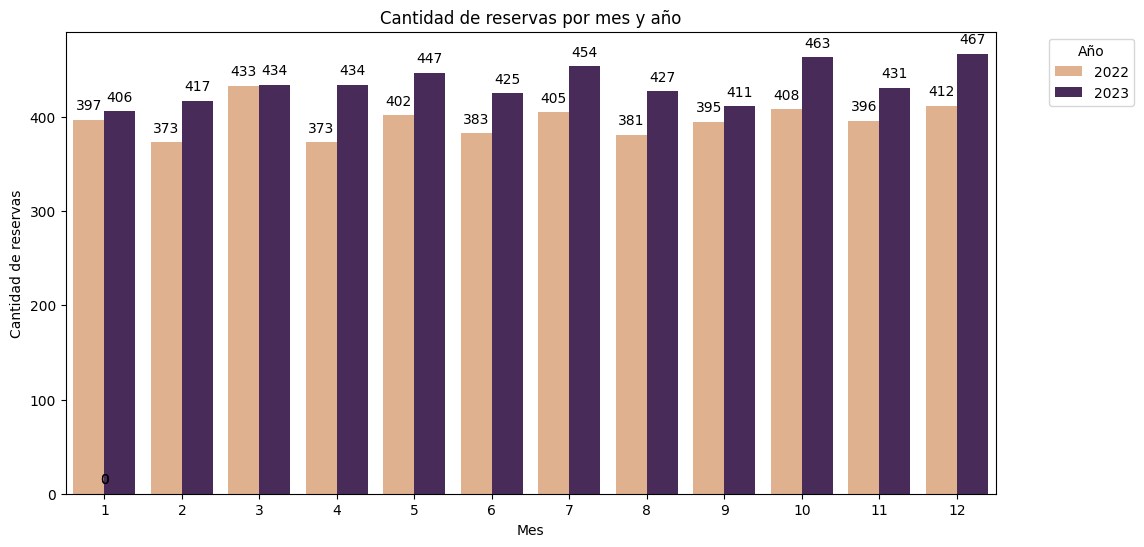

In [9]:
# Traemos la información anterior para graficar en seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=reservas_por_mes2, x='Month Period', y='value', hue='Year Period', palette="flare")

#Le brindamos información sobre los ajes al gráfico
plt.title('Cantidad de reservas por mes y año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reservas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Agregamos etiquetas de datos
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

#Generamos la visualización del gráfico
plt.show()

**¿Hay alguna tendencia temporal en las reservas, como picos en ciertas épocas del año?**

Como podemos identificar los puntos mas altos de reserva ocurren en los meses de Octubre, Diciembre y Julio respectivamente de mayor a menor, esto nos indica que nuestro hotel percibe mayor ocupación en temporada de fiestas, vacaciones de fin de año y mitad de año.

**Reservas en cantidad de noches**

A diferencia del grafico anterior, en esta ocasión podemos identificar la cantidad de noches que esta ocupado nuestro hotel de acuerdo a la frecuencia de noches que se quedan nuestros huespedes, podemos ver que la mayoria se hospedan el menor tiempo posible, esto genera que tengamos huespedes transitorios.

**¿Cuál es la distribución de la duración de las estadías en el hotel?**

Bueno como podemos ver la distribución la detectamos por la estadia por noche, en este caso poseemos un minimo de 1 noche y un maximo de 5 noches.

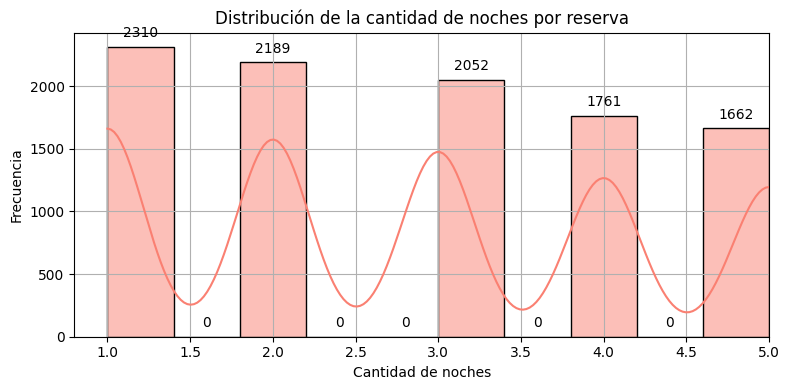

In [10]:
#En este caso utilizamos la columna "Total Nights" para identificar la frecuencia y ademas el tiempo de estadia que generalmente usan nuestros huespedes
plt.figure(figsize=(8, 4))
ax = sns.histplot(data=Serenity_sands, x='Total Nights', bins=10, kde=True, color='Salmon')
plt.title('Distribución de la cantidad de noches por reserva')
plt.xlabel('Cantidad de noches')
plt.ylabel('Frecuencia')
plt.grid(True)

# Ajustar rango del eje x
plt.xlim(right=5)

# Agregar etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
#Generamos la visualización de grafico.
plt.show()

**Caracteristicas de las habitaciones disponibles en Serenity Sands Resort**

**Habitación Deluxe:**

Amplia y lujosa habitación con vista al mar.
Cama king-size con colchón de lujo y sábanas de alta calidad.
Baño privado con bañera de hidromasaje y ducha de lluvia.
Balcón privado con sillas y mesa para disfrutar de la vista al mar.

TV de pantalla plana de 55 pulgadas con canales premium.
Mini bar surtido con bebidas y aperitivos de cortesía.
Servicio de habitaciones las 24 horas.

**Suite Familiar:**

Espaciosa suite perfecta para familias.
Dos habitaciones separadas: una para los padres y otra para los niños.
Cama king-size en la habitación principal y literas en la habitación infantil.
Baño privado en cada habitación con amenities para adultos y niños.
Zona de estar con sofá, mesa de comedor y TV de pantalla plana.
Cocina completamente equipada con nevera, microondas y cafetera.
Balcón privado con vista a la piscina y áreas de juegos para niños.
Acceso gratuito al club infantil con actividades supervisadas.

**Habitación Estándar:**

Cómoda habitación para parejas o viajeros individuales.
Cama queen-size con ropa de cama de calidad y almohadas suaves.
Baño privado con ducha y artículos de tocador básicos.
Escritorio de trabajo con silla ergonómica y conexión Wi-Fi gratuita.
TV de pantalla plana con canales por cable y películas a pedido.
Armario empotrado con perchas y espacio de almacenamiento.
Ventana con vistas al jardín o a la ciudad.
Servicio diario de limpieza y cambio de toallas.

**Descripción analitica de tipos de habitación con sus valores de pago a traves de reservas**

  En este caso podemos identificar el analisis sobre el valor abonado por los huespedes al momento de reservar agrupado a traves de los tipos de habitación, esto nos permite ver por ejemplo que el promedio mas alto en abonos corresponde a la habitación tipo suite con 632 usd.

In [11]:
#En esta ocación generamos una descripción rapida sobre las columnas "Room Type" y "Total Amount", esto con la intención de recolectar
#información analitica sobre los ingresos por cada tipo de habitación, sus cuartiles, promedios, minimos y maximos.
total_ingreso_por_tipo_habitacion = Serenity_sands.groupby('Room Type')['Total Amount'].describe().round()
total_ingreso_por_tipo_habitacion

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Deluxe,3392.0,383.0,191.0,120.0,246.0,381.0,548.0,750.0
Standard,3299.0,213.0,108.0,60.0,126.0,204.0,300.0,450.0
Suite,3283.0,632.0,323.0,200.0,400.0,630.0,908.0,1250.0


**Tarifas de las habitaciones de acuerdo la temporada y tipo de habitación**

Poemos identificar en el grafico cuales son las temporadas mas economicas con respecto a las tarifas generales de las habitaciones, la habitación Deluxe se presenta economica en el mes de Febrero, sin embarfo la habitación Standard se presenta como una gran opción en los meses de DIciembre y Enero, y la Deluxe para las vacaciones de Julio y Agosto.

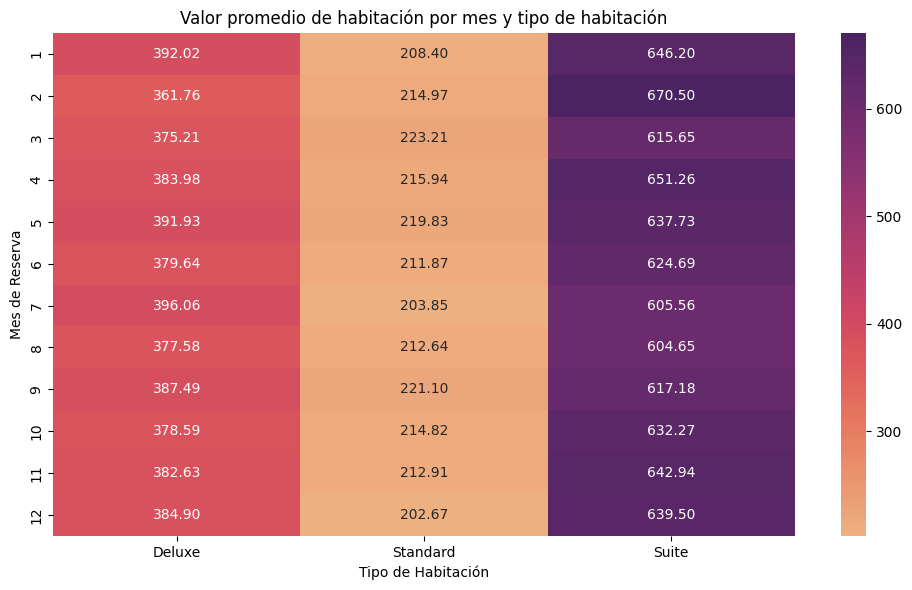

In [12]:
#Realizamos un promedio de ingreso de habitación sobre los meses indicados anteriormente sobre la columna "Booking Date",
#Nos permite ver el valor promedio en cada mes y a cuanto la abonaria el cliente dependiendo la fecha de reserva.
valor_promedio_por_mes_y_tipo_habitacion = Serenity_sands.groupby(['Month Period', 'Room Type'])['Total Amount'].mean().unstack()

# Graficamos un heatmap para que nos pueda ser mas facil identificar los valores por color, sean los mas bajos o los mas altos.
plt.figure(figsize=(10, 6))
sns.heatmap(valor_promedio_por_mes_y_tipo_habitacion,cmap='flare', annot=True, fmt=".2f")
plt.title('Valor promedio de habitación por mes y tipo de habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Mes de Reserva')
plt.tight_layout()

#Generamos la visualización del gráfico.
plt.show()

**Ingresos por tipo de habitación**

Relizamos la suma de todos los montos abonados para agrupar por tipo de habitación, como bien identificamos efectivamente la habitación tipo suite es de que mas ganancias podemos apreciar. Seguido por las habitaciones deluxe.

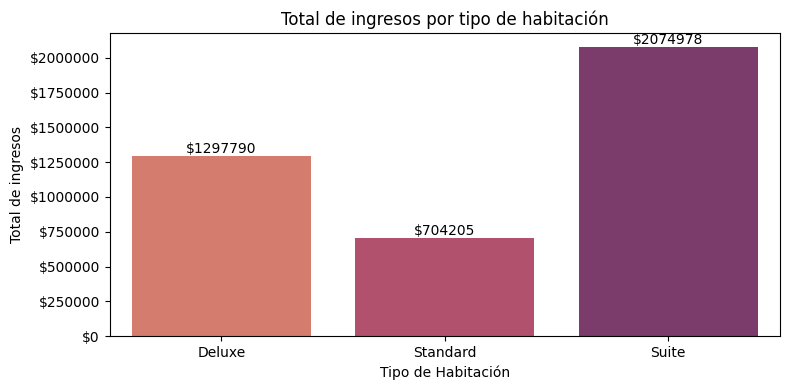

In [13]:
#Importamos matplotlib.ticker, es una herramienta en Matplotlib que te permite controlar cómo se muestran los números en los ejes de los gráficos.
import matplotlib.ticker as ticker

# Generamos una nueva variable para poder generar las sumas totales por habitación e ingreso que se percibió de las mismas.
total_ingreso_por_tipo_habitacion2 = Serenity_sands.groupby('Room Type')['Total Amount'].sum()

# Generamos los parámetros del gráfico.
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=total_ingreso_por_tipo_habitacion2.index, y=total_ingreso_por_tipo_habitacion2.values, hue=total_ingreso_por_tipo_habitacion2.index, palette='flare', legend=False)
plt.title('Total de ingresos por tipo de habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Total de ingresos')

# Usamos "ticker" de matplotlib para poder formatear las etiquetas del eje y que podamos verlo como moneda. Dejamos sin decimales para redondear.
formatter = ticker.FormatStrFormatter('$%.0f')
ax.yaxis.set_major_formatter(formatter)

# Generamos las etiquetas de datos para las barras.
for p in ax.patches:
    ax.annotate(f"${p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Evitamos que se superpongan los datos del gráfico.
plt.tight_layout()

# Generamos la visualización del gráfico.
plt.show()

**Verificando el estado de pagos**

Podemos identificar que el hotel no posee una politica de pagos inmediatos ante el servicio, por ende identificamos que varios de los pagos aun estan en estado pendiente, a pesar de observar gran concurrencia con las habitaciones tipo suite, podemos identificar que caso el 50% de los pagos no se realizaron aun, no permitiendo que podamos contar todo como un ingreso total.

In [14]:
# Calcular los ingresos totales por tipo de habitación y estado de pago
ingresos_por_tipo_y_estado = Serenity_sands.groupby(['Room Type', 'Payment Status'])['Total Amount'].sum().unstack()
ingresos_por_tipo_y_estado

Payment Status,Paid,Pending
Room Type,,
Deluxe,640340,657450
Standard,356771,347434
Suite,1029642,1045336


In [15]:
# Resetear el índice para que 'Room Type' sea una columna esto con la intención de poder usarlo en el grafico.
ingresos_por_tipo_y_estado = ingresos_por_tipo_y_estado.reset_index()
ingresos_por_tipo_y_estado

Payment Status,Room Type,Paid,Pending
0,Deluxe,640340,657450
1,Standard,356771,347434
2,Suite,1029642,1045336


In [16]:
# Convertir las columnas de los estados de pago en una sola columna utilizando melt, de esta forma podemos generar un pequeño dataset comprimiendo los datos.
#De esta forma podemos dilucidar el monto por cada estado de pago.
ingresos_por_tipo_y_estado_unificado = ingresos_por_tipo_y_estado.melt(id_vars='Room Type', var_name='Payment Status', value_name='Total Amount')
ingresos_por_tipo_y_estado_unificado

,Room Type,Payment Status,Total Amount
0,Deluxe,Paid,640340
1,Standard,Paid,356771
2,Suite,Paid,1029642
3,Deluxe,Pending,657450
4,Standard,Pending,347434
5,Suite,Pending,1045336


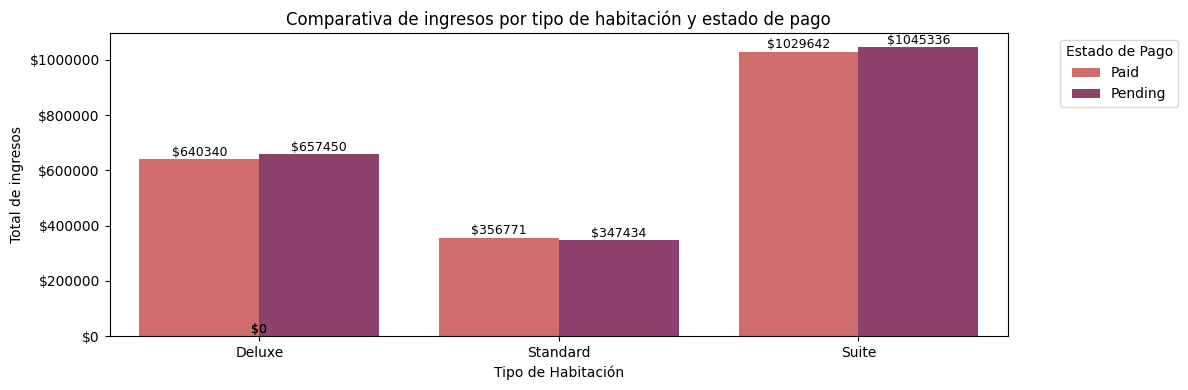

In [17]:
# Gráfico de barras agrupado
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=ingresos_por_tipo_y_estado_unificado, x='Room Type', y='Total Amount', palette='flare', hue='Payment Status')
plt.title('Comparativa de ingresos por tipo de habitación y estado de pago')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Total de ingresos')
plt.legend(title='Estado de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')

# Usamos "ticker" de matplotlib para poder formatear las etiquetas del eje y que podamos verlo como moneda. Dejamos sin decimales para redondear.
formatter = ticker.FormatStrFormatter('$%.f')
ax.yaxis.set_major_formatter(formatter)

# Agregamos etiquetas de datos, le dejamos "f"${p.get_height():.0f}" para evitar los decimales y dar formato a la información.
for p in ax.patches:
    ax.annotate(f"${p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

#Al correr el código aparecia un "0$", para que esto no sucediera identifico que era porque lo tomaba desde cero al eje, por eso debemos ajustarlo.
#Al ajustar el límite del eje x con plt.xlim(left=0.5), aseguramos que el eje x comience en un valor ligeramente mayor que cero, evitando así que el "0$" aparezca en el gráfico.
#plt.xlim(left=0.1), sin embargo elimina las primeras barras de información.


# Evitamos la superposición de el grafico y la información del mismo
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Habitaciones mas reservadas**

En este caso generamos un gtrafico de torta, para visualizar de forma mas llamativa cual de lo tipos de habitación es la mas reservada, en este caso podemos identificar quer es la tipo deluxe, sin embargo podemos identificar que es poca la diferencia entre las demas llevandose casi un 2% entre cada una.

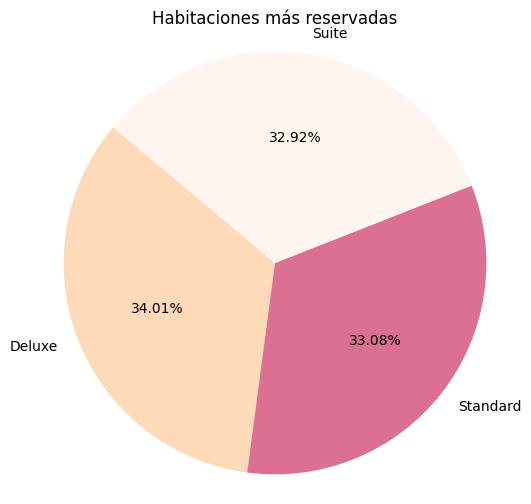

In [18]:
#Identificamos la variable para definir las habitaciones mas reservadas a traves del campo "Room Type"
habitaciones_mas_reservadas = Serenity_sands['Room Type'].value_counts()

# Creamos el gráfico de torta
plt.figure(figsize=(6, 6))
habitaciones_mas_reservadas.plot(kind='pie', autopct='%2.2f%%', startangle=140, colors=['PeachPuff','PaleVioletRed','SeaShell'])
#Me tomo la libertad de seleccionar los colores para mantener unificados los colores de los graficos a lo largo del analisis.
plt.title('Habitaciones más reservadas')
plt.ylabel('')

# Hacemos que el gráfico de torta tenga un aspecto circular
plt.axis('equal')

# Generamos la visualiación del gráfico
plt.show()

**¿Cuáles son los tipos de habitaciones más populares entre los huéspedes?**

En este punto ya podemos iniciar las conclusiones sobre las preguntas planteadas al inicio del analisis, como podemos identificar la habitación mas reservada corresponde a la habitación deluxe,la cual la posicionaria como la habitación mas popular entre los huespedes, sin embargo la habitación standar y Suite no estan muy lejos de esta posición.

In [19]:
# Calcular la cantidad de habitaciones ocupadas por combinación de tipo de habitación y total de noches
habitaciones_ocupadas = Serenity_sands.groupby(['Total Nights', 'Room Type']).size().reset_index(name='Cantidad de Habitaciones Ocupadas')
habitaciones_ocupadas

,Total Nights,Room Type,Cantidad de Habitaciones Ocupadas
0,1,Deluxe,769
1,1,Standard,734
2,1,Suite,807
3,2,Deluxe,754
4,2,Standard,726
5,2,Suite,709
6,3,Deluxe,719
7,3,Standard,695
8,3,Suite,638
9,4,Deluxe,590


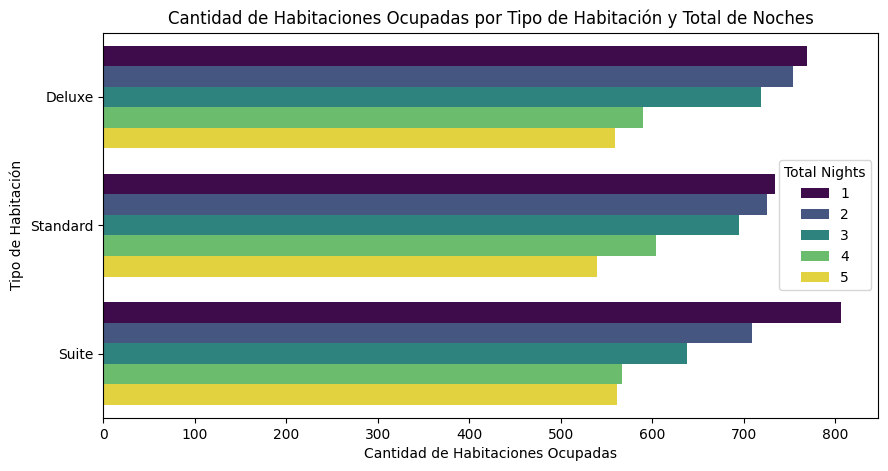

In [20]:
# Crear un gráfico de barras agrupado
plt.figure(figsize=(10, 5))
sns.barplot(x='Cantidad de Habitaciones Ocupadas', y='Room Type', hue='Total Nights', data=habitaciones_ocupadas, palette='viridis')

# Establecer título y etiquetas de los ejes
plt.title('Cantidad de Habitaciones Ocupadas por Tipo de Habitación y Total de Noches')
plt.xlabel('Cantidad de Habitaciones Ocupadas')
plt.ylabel('Tipo de Habitación')

# Mostrar el gráfico
plt.show()

**¿Existe una relación entre la duración de la estadía y el tipo de habitación reservada?**
Como podemos ver la habitación con mas duración en las estadias es la tipo suite, sin embargo no se detecta un margen importante sobre las diferentes tipos de habitación.

**Nacionalidades**

En este caso podemos identificar que la mayoria de nuestros huespedes son de nacionalidad Estadounidense, seguidos de Bulgaria, Romania e Italia.

In [21]:
#Generamos un conteo a partir del campo "Nacionality"
reservas_por_nacionalidad = Serenity_sands['Nationality'].value_counts().reset_index()
reservas_por_nacionalidad

,Nationality,count
0,United States,798
1,Bulgaria,455
2,Romania,366
3,Italy,339
4,Serbia,336
5,Sweden,325
6,Spain,321
7,Belgium,315
8,Germany,312
9,Croatia,292


In [22]:
#Identificamos las columnas que poseera este pequeño dataset para incluir la información obtenida en estos nuevos campos.
reservas_por_nacionalidad.columns = ['Nacionalidad', 'Cantidad de Reservas']
reservas_por_nacionalidad.columns

Index(['Nacionalidad', 'Cantidad de Reservas'], dtype='object')

In [23]:
#Generamos la suma de las reservas para identificar las cantidades en el gráfico.
total_reservas = reservas_por_nacionalidad['Cantidad de Reservas'].sum()
total_reservas

9974

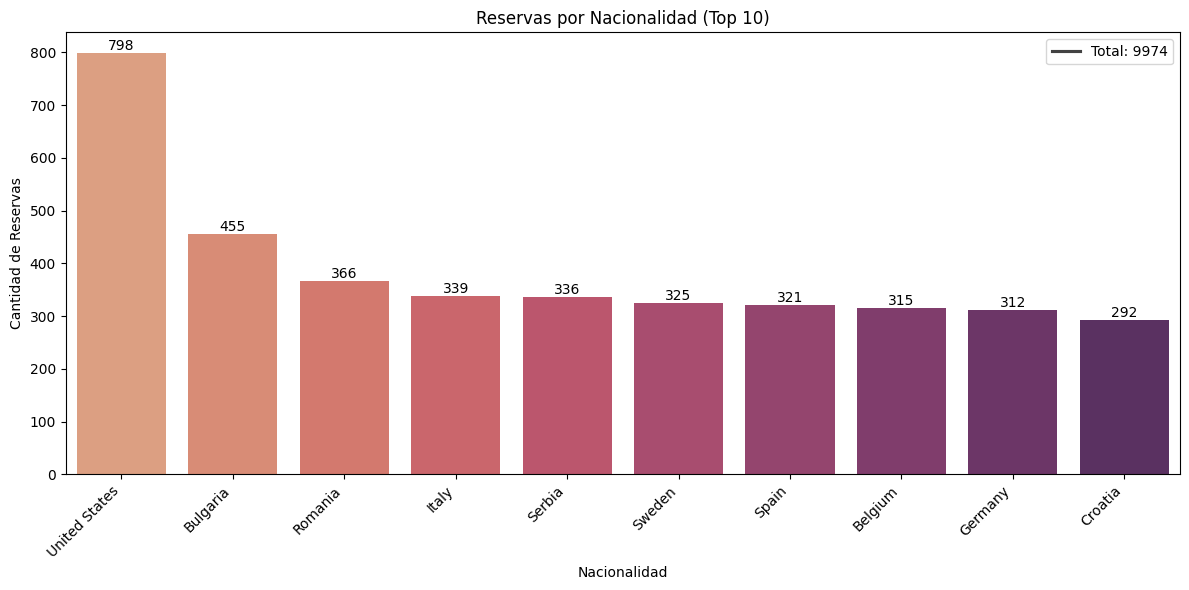

In [24]:
# Obtenemos las primeras 10 nacionalidades con más reservas, de esta forma el gráfico se visualizaria mas limpio y claro.
top_10_nacionalidades = reservas_por_nacionalidad.head(10)

# Crear un gráfico de barras para visualizar las reservas por nacionalidad
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_nacionalidades, x='Nacionalidad', y='Cantidad de Reservas', hue='Nacionalidad', palette='flare')

# Establecer títulos y etiquetas de ejes para el gráfico
plt.title('Reservas por Nacionalidad (Top 10)')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Reservas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend([f'Total: {total_reservas}'], loc='upper right')

# Agregar etiquetas de datos
for index, value in enumerate(top_10_nacionalidades['Cantidad de Reservas']):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Generámos la visualización del gráfico.
plt.show()

**Distribución por genero y edad**

Podemos identificar que de la totalidad de nuestros huespedes teniendo en cuenta que su gran mayoria son adultos, entre los generos no se posee una diferencia notoria, al contrario podemos identificar que mabos se encuentran dentro de los parametros equilibrados.

In [25]:
#Generamos la suma a traves de los campos "Gender" y "Adult" generando un filtro para identificar la totalidad de huespedis con estas especificaciones.
genero_adultos = Serenity_sands.groupby('Gender')['Adults'].sum()
genero_adultos

Gender
Female    12435
Male      12470
Name: Adults, dtype: int64

In [26]:
#Generamos la suma a traves de los campos "Gender" y "Children" generando un filtro para identificar la totalidad de huespedis con estas especificaciones.

genero_niños = Serenity_sands.groupby('Gender')['Children'].sum()
genero_niños

Gender
Female    4934
Male      4922
Name: Children, dtype: int64

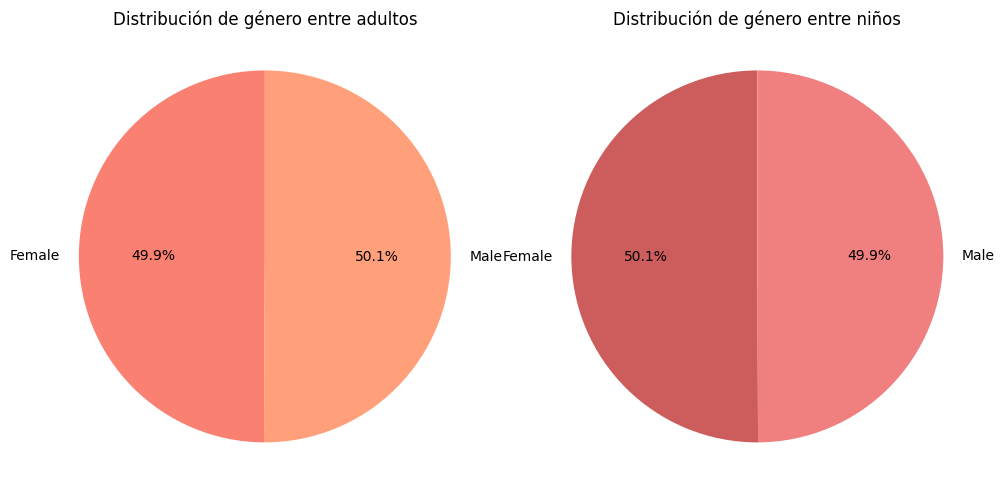

In [27]:
#Generamos las mediciones para el gráfico
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Etiquetas y colores para los géneros, me tomo la libertad de asignar colores personalizados, la intención es mantener
#unificados los graficos durante el analisis
labels = genero_adultos.index
colors = ['#ff9999','#66b3ff','#99ff99']

# Crear gráfico de torta para adultos
axs[0].pie(genero_adultos, labels=labels, colors=['Salmon', 'LightSalmon'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribución de género entre adultos')

# Crear gráfico de torta para niños
axs[1].pie(genero_niños, labels=labels, colors=['IndianRed', 'LightCoral'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribución de género entre niños')

# Ajustar aspectos de la visualización del gráfico.
for ax in axs:
    ax.axis('equal')

# Evitamos la superposición de el grafico y la información del mismo
plt.tight_layout()
#Generamos la visualización del gráfico.
plt.show()

**Servicios ofrecidos por el Hotel**

Podemos identificar que de los tres servicios menos del 50% de nuestros huespedes solicitan hacer uso de los mismos, se deberia evaluar si es por desconocimiento de los mismos, o puede ser que piensen en el cobro, podria sumarmes alguno o todos en algunas reservas dependiendo la temporada de hospedaje para potenciar las temporadas bajas.

In [28]:
# Obtener la frecuencia de cada característica
breakfast_frequency = Serenity_sands['Breakfast Included'].value_counts()
breakfast_frequency

Breakfast Included
No     5008
Yes    4966
Name: count, dtype: int64

In [29]:
# Obtener la frecuencia de cada característica
spa_frequency = Serenity_sands['Spa Package Included'].value_counts()
spa_frequency

Spa Package Included
No     5059
Yes    4915
Name: count, dtype: int64

In [30]:
# Obtener la frecuencia de cada característica
pickup_frequency = Serenity_sands['Airport Pickup Included'].value_counts()
pickup_frequency

Airport Pickup Included
No     5011
Yes    4963
Name: count, dtype: int64

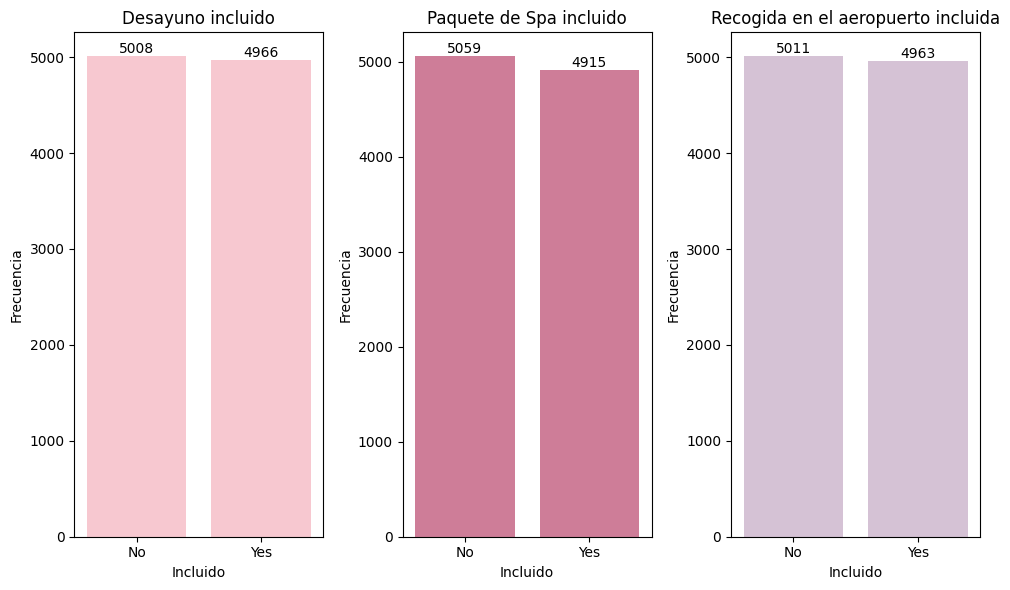

In [31]:
# Generamos un gráfico de barras por cada caracteristica.
plt.figure(figsize=(10, 6))

# Gráfico de barras para 'Breakfast Included'
plt.subplot(1, 3, 1)
sns.barplot(x=breakfast_frequency.index, y=breakfast_frequency.values,color='Pink')
plt.title('Desayuno incluido')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Breakfast Included'
for index, value in enumerate(breakfast_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Gráfico de barras para 'Spa Package Included'
plt.subplot(1, 3, 2)
sns.barplot(x=spa_frequency.index, y=spa_frequency.values,color='PaleVioletRed')
plt.title('Paquete de Spa incluido')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Spa Package Included'
for index, value in enumerate(spa_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Gráfico de barras para 'Airport Pickup Included'
plt.subplot(1, 3, 3)
sns.barplot(x=pickup_frequency.index, y=pickup_frequency.values,color='Thistle')
plt.title('Recogida en el aeropuerto incluida')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Airport Pickup Included'
for index, value in enumerate(pickup_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Evitamos la superposición de el grafico y la información del mismo
plt.tight_layout()

#Generamos la visualización del gráfico.
plt.show()

**¿Qué porcentaje de huéspedes solicita servicios adicionales como desayuno, paquete de spa o recogida en el aeropuerto?**

De acuerdo a la cantidad que percibimos en el gráfico, podemos decir que cerca del 40% de los huespedes solicitan los servicios adicionales.

**Servicios ofrecidos mas solicitados de acuerdo a la nacionalidad**

Como podemos ver en los gráficos, nuestros huespedes mas concurridos e inclusive los que mas solicitan nuestros servicios son de nacionalidad Estadounidense, siendo seguido por Bulgaria, a partir del 3er puesto podemos identificar varianzas en las nacionalidades que optan por solicitarnos algo mas que la estadia, podemos pensar a futuro ofrecer con su reserva a las nacionalidades involucradas estos amenites, con la intención de mejorar su experiencia.

In [32]:
# Filtrar los datos para cada servicio
servicios = ['Breakfast Included', 'Spa Package Included', 'Airport Pickup Included']
#Le indicamos a python que "top_nacionalidades_por_servicio" es un conjunto.
top_nacionalidades_por_servicio = {}

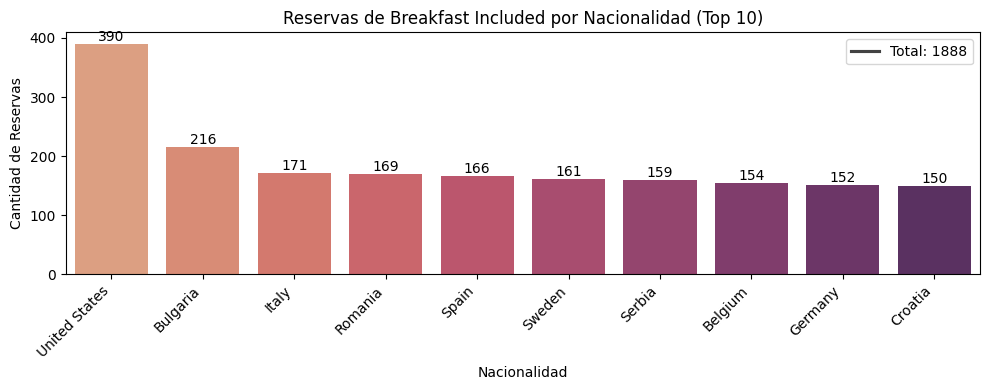

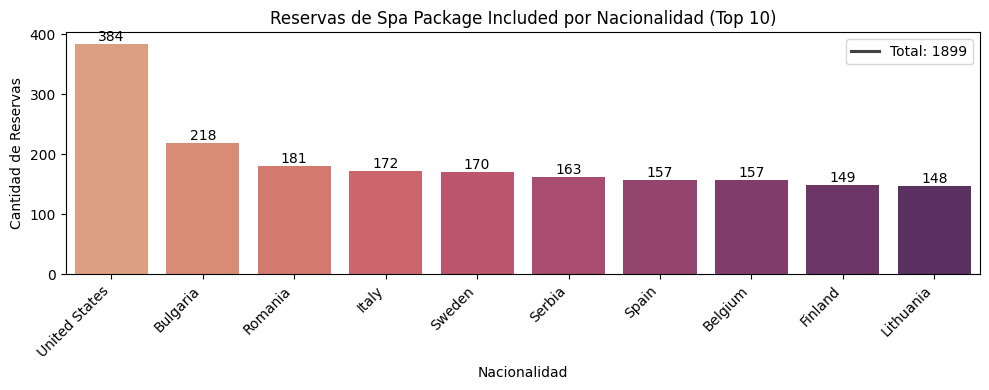

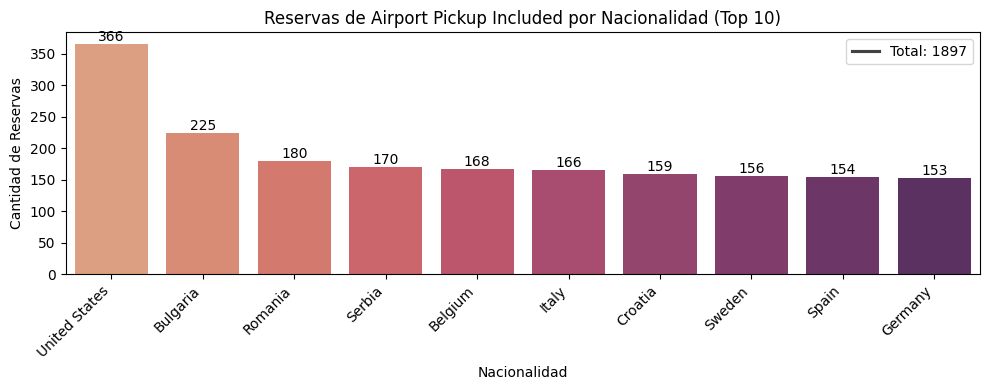

In [33]:
#Generamos un for para que pueda identificatr los campos "yes" en las columnas, va a estar generando el recorrido para poder
#identificar los campos como la cantidad de nacionalidades que se repiten, identificar las 10 mas repetidas y finalizar con un listado para asignarle.
for servicio in servicios:
    # Filtrar las filas donde el servicio está incluido
    servicio_incluido = Serenity_sands[Serenity_sands[servicio] == 'Yes']

    # Contar la cantidad de veces que aparece cada nacionalidad
    reservas_por_nacionalidad = servicio_incluido['Nationality'].value_counts().reset_index()
    reservas_por_nacionalidad.columns = ['Nacionalidad', 'Cantidad de Reservas']

    # Obtener las 10 nacionalidades con más reservas
    top_10_nacionalidades = reservas_por_nacionalidad.head(10)

    # Guardar el resultado para este servicio
    top_nacionalidades_por_servicio[servicio] = top_10_nacionalidades


# Volvemos a generar un for para poder generatr el gráfico, esto genera que al usar el for el mismo repase los datos y genere los gráficos pertinentes,
#evitamos ademas generar un codigo por cada gráfico diciendole a for que los genere en base a su recorrido.
for servicio, top_nacionalidades in top_nacionalidades_por_servicio.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(data=top_nacionalidades, x='Nacionalidad', y='Cantidad de Reservas', hue='Nacionalidad', palette='flare')

    # Establecer títulos y etiquetas de ejes
    plt.title(f'Reservas de {servicio} por Nacionalidad (Top 10)')
    plt.xlabel('Nacionalidad')
    plt.ylabel('Cantidad de Reservas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend([f'Total: {top_nacionalidades["Cantidad de Reservas"].sum()}'], loc='upper right')

    # Agregar etiquetas de datos
    for index, value in enumerate(top_nacionalidades['Cantidad de Reservas']):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Evitamos la superposición de el grafico y la información del mismo
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

**Fuente de contacto para reservar**

Podemos identificar que la mayoria de nuestros huespedes ingresan sus reservas a traves nuestra pagina WEB, seguido de via telefonica, de igual forma debemos denotar la gran concurrencia de reservas o ingresos sobre personas van directo a nuestras instalaciones lo cual no es normal para el sertvicio de hoteleria, se debe evaluar brindarles opciones de reservar desde la comodidad de sus hogares via telefonica o visitando nuestra pagina web.

In [34]:
# atraves del conteo identificamos la frecuencia con la que se realiza la reserva a traves de que vía con el campo "Reservation Source"
reservation_source_frequency = Serenity_sands['Reservation Source'].value_counts()
reservation_source_frequency

Reservation Source
Website             2569
Phone               2526
Walk-in             2441
Booking Platform    2438
Name: count, dtype: int64

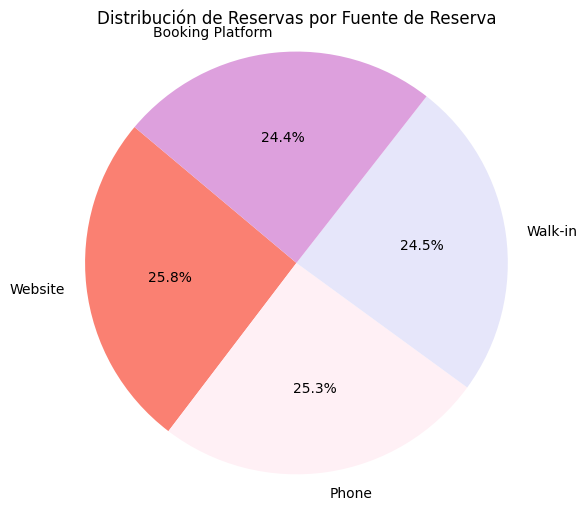

In [35]:
# Generamos la selección de colores para el gráfico.
colors = ['Salmon', 'LavenderBlush', 'Lavender', 'Plum']

# Ggeneramos un gráfico de torta para identificar los datos
plt.figure(figsize=(6, 6))
plt.pie(reservation_source_frequency.values, labels=reservation_source_frequency.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Reservas por Fuente de Reserva')
plt.axis('equal')

#Generamos la visualización del gráfico.
plt.show()

**Edades de nuestros huespedes**

De acuerdo a nuestros registros nues tros huespedes mas frecuentes se ensuentran entre los 40, 60 y 80 años de edad, con esto podemos delucidar ademas la poca concurrencia de niños dentro de las reservaciones.

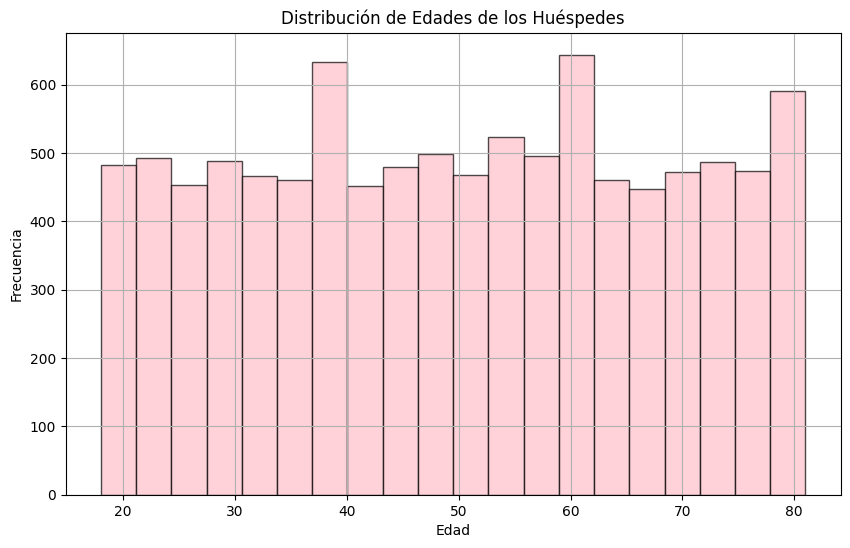

In [36]:
# Primero, convierte la columna 'Birthdate' al formato de fecha
Serenity_sands['Birthdate'] = pd.to_datetime(Serenity_sands['Birthdate'])

# Calcula la edad restando la fecha de nacimiento del año actual
current_year = pd.Timestamp.now().year
Serenity_sands['Age'] = current_year - Serenity_sands['Birthdate'].dt.year

# Graficar el histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(Serenity_sands['Age'], bins=20, color='Pink', edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades de los Huéspedes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

#Generamos la visualización del gráfico.
plt.show()

**¿Cuál es la distribución de edades de los huéspedes y cómo se relaciona con la duración de la estadía o los servicios solicitados?**

Como dato inicial para responder esta pregunta, podemos identificar que los huespedes con edades entre los 23 años hasta los 56 podrian ser nuestro grupo de huespedes con mayor duración en su estadia. Y en promedio tambien concuerdan con los servicios que se suman a sus solicitudes como el pickup del aeropuerto, desayuno y servicios de spa.

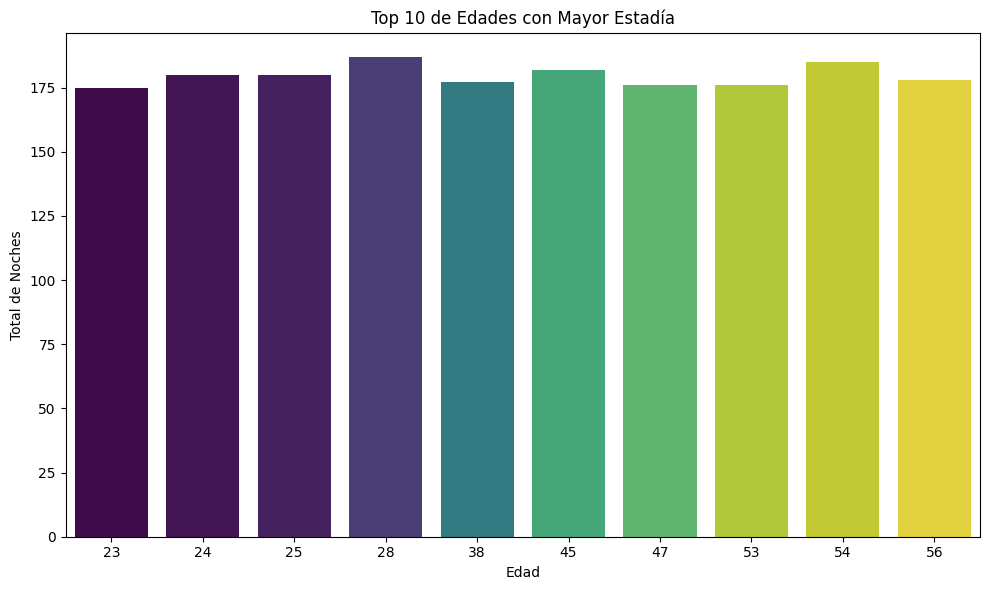

In [37]:
# Calcular el top 10 de edades con mayor estadía
top_10_edades = Serenity_sands['Age'].value_counts().head(10).reset_index()
top_10_edades.columns = ['Age', 'Total Nights']  # Renombrar las columnas

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Total Nights', data=top_10_edades, palette='viridis', hue='Age', legend=False)

# Establecer título y etiquetas de los ejes
plt.title('Top 10 de Edades con Mayor Estadía')
plt.xlabel('Edad')
plt.ylabel('Total de Noches')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [38]:
top_10_edades

,Age,Total Nights
0,28,187
1,54,185
2,45,182
3,24,180
4,25,180
5,56,178
6,38,177
7,47,176
8,53,176
9,23,175


**Servicios ofrecidos por la edad de los huespedes**

  Como podemos observar que en cuanto al desayuno los que predominan son los veinteañeros (28 años), en cambio con respecto al uso del spa son sobrepasados por los de edad entre los 50 años, y en cuanto a pick up del aeropuerto podemos ver que a partir de los 40 los huespedes prefieren esta comodidad. Esta información nos puede ayudar para ofrecer cietrtos servicios a los huespedes de acuerdo a su edad para mejorar su experiencia y generar una estadia mas comoda.

In [39]:
#Creamos un conjunto para generar el top por servicio.
top_Edades_por_servicio = {}

#Recurrimos al siempre confiable for como hicimos anteriomente con las nacionalidades, esto con el fin de generar un bucle que se revorra de acuerdo a:
for servicio in servicios:

#Identificamos dentro del bucle los servicios que poseen "yes" en su casilla para identificar los positivos.
    servicio_incluido = Serenity_sands[Serenity_sands[servicio] == 'Yes']

#Hacemos un conteo sobre el campo Edad usado anteriormente y reseteamos el index para sustituirlo
    reservas_por_Edad = servicio_incluido['Age'].value_counts().reset_index()

#Sustituimos los nombres de los campos para conformar un nuevo dataset pequeño para optimizar la información que necesitamos.
    reservas_por_Edad.columns = ['Edad', 'Cantidad de Reservas']

#Solicitamos que solo nos traigan los primero 5 con indices mas altos de solicitud de servivios
    top_5_Edades = reservas_por_Edad.head(5)

#Generamos la variable que va a contener la información solicitada
    top_Edades_por_servicio[servicio] = top_5_Edades


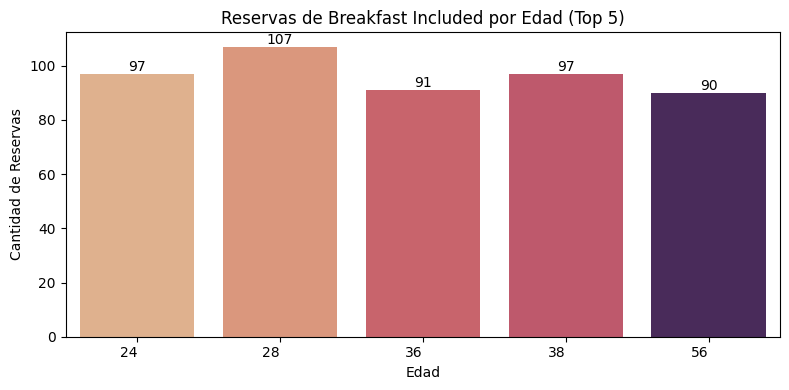

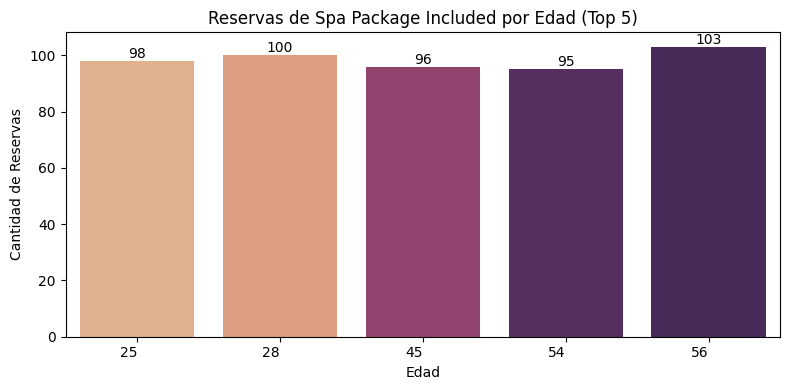

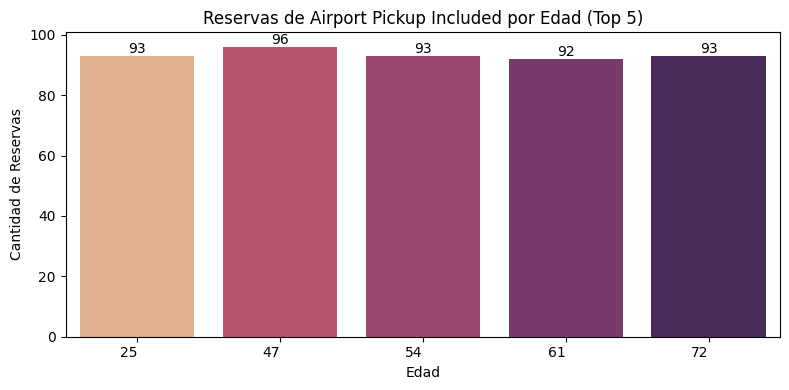

In [40]:
# Volvemos a generar un for para poder generar el gráfico, iterando sobre los servicios y sus datos correspondientes
for servicio, top_Edades in top_Edades_por_servicio.items():

    # Ordenamos el DataFrame por la columna 'Edad' antes de graficar
    top_Edades = top_Edades.sort_values(by='Edad')


#Generamos las indicaciones con las variables para el gráfico, recordemos que el mismo se estara generando a traves de un bucle con for,
#de esta forma tambien creara el numero de gráficos que necesitamos
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=top_Edades, x='Edad', y='Cantidad de Reservas', hue='Edad', palette='flare', legend=False)

    # Establecemos los titulos y etiquetas
    plt.title(f'Reservas de {servicio} por Edad (Top 5)')
    plt.xlabel('Edad')
    plt.ylabel('Cantidad de Reservas')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()


    # Agregamos etiquetas de datos
    for index, value in enumerate(top_Edades['Cantidad de Reservas']):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    #Evitamos la superposición de los datos
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

**Machine Learning**

**Predicción de los ingresos:**

 Nos proponemos a traves del modelo de machine learning buscar los futuros ingresos del hotel en base a los valores de reserva, proponemos como objetivo la variable "Room type Rate", como los datos en general son muy categoricos decidimos iniciar con un one hot para darle una base a los datos y poder evaluar el dataset en conjunto.

 **Nota: Se dejan las librerias dentro de cada modulo de codigo ya que google colab genera reinicios constantes cuando se intenta el ajuste de los hiperparametros para mejorar el modelo, el mismo le cuesta avanzar con la carga del codigo y para evitar correr una y otraves todo el notebook se prefiere dejar en lo posible las librerias sumadas a los modulos.**


**Mean Squared Error (MSE):**

¿Qué es?: El Error Cuadrático Medio es una medida de cuánto se desvían, en promedio, las predicciones de un modelo de regresión de los valores reales.

¿Cómo se calcula?: Para cada predicción del modelo, se calcula la diferencia al cuadrado entre la predicción y el valor real. Luego, se calcula el promedio de estos cuadrados para obtener el MSE.

¿Qué significa?: Un MSE más bajo indica que el modelo tiene un mejor rendimiento, ya que las predicciones tienden a estar más cerca de los valores reales. Un MSE de 0 significa que el modelo predice perfectamente los datos.

**R^2 Score:**

¿Qué es?: El Coeficiente de Determinación (R cuadrado) es una medida de cuánta variabilidad en los datos es explicada por el modelo. Es una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales.

¿Cómo se calcula?: Se calcula la proporción de la varianza total de los datos que es explicada por el modelo. Un R cuadrado de 1 indica un ajuste perfecto del modelo a los datos, mientras que un R cuadrado de 0 indica que el modelo no explica ninguna variabilidad en los datos.

¿Qué significa?: Un R cuadrado más alto indica que el modelo explica una mayor proporción de la variabilidad en los datos. Sin embargo, es importante tener en cuenta que un R cuadrado alto no garantiza que el modelo sea útil o preciso.

**Random forest classifier**

Iniciamos el testeo de modelos con el Random forest classifier, para optimizar el modelo generamos un tratamiento sobre los datos, la intención es recurrir a un one hot, dividimos los datos en 3 faces para brindarle mas posicionamiento al modelo en cuanto al testeo, prueba y validación, como podemos ver el MSE nos brinda un numero adecuado, sin embargo:

In [41]:
import pandas as pd
# Cargamos el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Elimina la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto combinado de validación y prueba
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Dividir el conjunto combinado de validación y prueba en conjunto de validación y conjunto de prueba
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


# Inicializar el modelo (en este caso, un clasificador de bosques aleatorios)
modelo = RandomForestClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)

y_pred = modelo .predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE en el conjunto de prueba utilizando características seleccionadas:", mse)

MSE en el conjunto de prueba utilizando características seleccionadas: 191.44737721349816


Evaluación del modelo:

Como podemos ver los resultados son muy bajos para identificar como util el modelo propuesto,

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensibilidad):", recall)
print("F1-score:", f1)
print("Matriz de Confusión:")
print(conf_matrix)

Exactitud (Accuracy): 0.05813564984964918
Precisión (Precision): 0.060863487649440606
Recall (Sensibilidad): 0.05813564984964918
F1-score: 0.05281857613272646
Matriz de Confusión:
[[0 1 7 ... 0 0 0]
 [0 1 8 ... 0 0 0]
 [1 1 6 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 3]]


Exactitud (Accuracy):

 Es la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, la exactitud es muy baja, lo que indica que el modelo no está clasificando correctamente la mayoría de las instancias.

Precisión (Precision):

Es la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de predicciones positivas realizadas. Una baja precisión indica que el modelo tiende a hacer muchas falsas alarmas, es decir, clasifica algunas instancias como positivas cuando en realidad son negativas.

Recall (Sensibilidad):

Es la proporción de instancias positivas que fueron correctamente identificadas por el modelo (verdaderos positivos) sobre el total de instancias que realmente son positivas (verdaderos positivos más falsos negativos). Una baja sensibilidad indica que el modelo no está identificando correctamente muchas de las instancias positivas.

F1-score:
Es la media armónica de precisión y sensibilidad. Proporciona un equilibrio entre ambas métricas. Un valor bajo de F1-score indica un bajo rendimiento del modelo tanto en precisión como en sensibilidad.

Matriz de Confusión:

 Es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por el modelo en cada una de las clases. Cada fila de la matriz representa las instancias en una clase real, mientras que cada columna representa las instancias en una clase predicha por el modelo.

**Nuevo intento**:

Uso el mismo modelo, sin embargo en esta ocasión intentamos dterminar las features mas correlativas para que la evaluación se centre en ellas,

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Eliminar la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Dividir los datos en conjunto de entrenamiento y conjunto combinado de validación y prueba
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Dividir el conjunto combinado de validación y prueba en conjunto de validación y conjunto de prueba
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Inicializar el modelo (en este caso, un clasificador de bosques aleatorios)
modelo = RandomForestClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = modelo.feature_importances_

# Obtener el nombre de las características
feature_names = X.columns

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar las características por importancia
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(7)['Feature']

# Seleccionar solo las características más importantes
X_selected = X[top_features]

# Dividir nuevamente los datos con las características seleccionadas
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las características seleccionadas
modelo_selected = RandomForestClassifier()
modelo_selected.fit(X_train_selected, y_train_selected)

# Realizar predicciones en el conjunto de prueba
y_pred_selected = modelo_selected.predict(X_test_selected)

# Calcular el error cuadrático medio
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
print("MSE en el conjunto de prueba utilizando las características seleccionadas:", mse_selected)

# Mostrar las características seleccionadas
print("Las 7 características con mejor rendimiento son:")
print(top_features)

MSE en el conjunto de prueba utilizando las características seleccionadas: 147.16641604010024
Las 7 características con mejor rendimiento son:
8              Total Amount
48768      Room Type_Deluxe
2               Postal Code
48769    Room Type_Standard
0            Reservation ID
1                  Guest ID
11                      Age
Name: Feature, dtype: object


En este caso al evaluar podemos identificar que aumenta al 20% aproximadamente sobre sus resultados positivos, el modelo en definitiva no es util para poder seguir con el.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_test_selected, y_pred_selected)

# Calcular el recall
recall = recall_score(y_test_selected, y_pred_selected, average='weighted')

# Calcular el F1-score
f1 = f1_score(y_test_selected, y_pred_selected, average='weighted')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)

print("Precisión:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.21303258145363407
Recall: 0.21303258145363407
F1-score: 0.213354073615121
Matriz de confusión:
[[ 5  0  1 ...  0  0  0]
 [ 0 10  2 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  2  5  0]
 [ 0  0  0 ...  0  0  7]]


**Regresión logistica**

En este caso tomamos el codigo creado para el tratamiento de los datos del dataset y seleccionar el valor objetivo, generamos la partición de los datos para que pueda testear y probar la intención de generar un subconjunto es que se puedan generar 3 faces de interacción con el modelo, le solicitamos ademas de evaluar nos indique cuales son las 5 variables mas representativas.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Eliminar la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Dividir los datos en conjunto de entrenamiento y conjunto combinado de validación y prueba
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Dividir el conjunto combinado de validación y prueba en conjunto de validación y conjunto de prueba
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Inicializar el modelo de Regresión Logística
modelo = LogisticRegression()

# Entrenar el modelo con todas las características
modelo.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = abs(modelo.coef_[0])

# Obtener el nombre de las características
feature_names = X.columns

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar las características por importancia y seleccionar las 5 más importantes
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature']

# Seleccionar solo las características más importantes
X_selected = X[top_features]

# Dividir nuevamente los datos con las características seleccionadas
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística con las características seleccionadas
modelo_selected = LogisticRegression()
modelo_selected.fit(X_train_selected, y_train_selected)

# Realizar predicciones en el conjunto de prueba
y_pred_selected = modelo_selected.predict(X_test_selected)

# Calcular métricas de evaluación
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
precision_selected = precision_score(y_test_selected, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test_selected, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test_selected, y_pred_selected, average='weighted')
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

# Mostrar resultados
print("Precisión con las 5 características seleccionadas:", accuracy_selected)
print("Recall con las 5 características seleccionadas:", recall_selected)
print("F1-score con las 5 características seleccionadas:", f1_selected)
print("Matriz de confusión con las 5 características seleccionadas:")
print(conf_matrix_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión con las 5 características seleccionadas: 0.015538847117794486
Recall con las 5 características seleccionadas: 0.015538847117794486
F1-score con las 5 características seleccionadas: 0.0034611996381853152
Matriz de confusión con las 5 características seleccionadas:
[[0 2 2 ... 0 0 0]
 [0 3 2 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Precisión:**
La precisión es la proporción de predicciones correctas entre todas las predicciones realizadas por el modelo. En este caso, la precisión es aproximadamente 0.0486, lo que significa que alrededor del 4.86% de las predicciones realizadas por el modelo son correctas.
**Recall:**
El recall (también conocido como sensibilidad) es la proporción de instancias positivas que fueron correctamente identificadas por el modelo. En este caso, el recall también es aproximadamente 0.0486, lo que indica que alrededor del 4.86% de las instancias positivas en el conjunto de prueba fueron correctamente identificadas por el modelo.

**F1-score:**
El F1-score es la media armónica de la precisión y el recall. Es una medida que tiene en cuenta tanto la precisión como el recall. En este caso, el F1-score es aproximadamente 0.0244, lo que sugiere que el modelo tiene un rendimiento bajo en términos de precisión y recall.

**Matriz de confusión:**
 La matriz de confusión muestra la cantidad de instancias que fueron clasificadas correctamente e incorrectamente por el modelo, organizadas por clase. Los valores diagonales de la matriz representan las predicciones correctas, mientras que los valores fuera de la diagonal representan los errores de clasificación.


 **Esta vez, el escalado de los datos podría ayudar al algoritmo de optimización a converger más fácilmente. Al intentarlo podemos ver que la evaluación final no es muy optima para seguir con el modelo actual.**

In [46]:
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Escalar los conjuntos de datos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Entrenar el modelo de Regresión Logística con los datos escalados
modelo_selected_scaled = LogisticRegression()
modelo_selected_scaled.fit(X_train_scaled, y_train_selected)

# Realizar predicciones en el conjunto de prueba
y_pred_selected_scaled = modelo_selected_scaled.predict(X_test_scaled)

# Calcular métricas de evaluación
accuracy_selected_scaled = accuracy_score(y_test_selected, y_pred_selected_scaled)
precision_selected_scaled = precision_score(y_test_selected, y_pred_selected_scaled, average='weighted')
recall_selected_scaled = recall_score(y_test_selected, y_pred_selected_scaled, average='weighted')
f1_selected_scaled = f1_score(y_test_selected, y_pred_selected_scaled, average='weighted')
conf_matrix_selected_scaled = confusion_matrix(y_test_selected, y_pred_selected_scaled)

# Mostrar resultados
print("Precisión con las 5 características seleccionadas y datos escalados:", accuracy_selected_scaled)
print("Recall con las 5 características seleccionadas y datos escalados:", recall_selected_scaled)
print("F1-score con las 5 características seleccionadas y datos escalados:", f1_selected_scaled)
print("Matriz de confusión con las 5 características seleccionadas y datos escalados:")
print(conf_matrix_selected_scaled)

Precisión con las 5 características seleccionadas y datos escalados: 0.017042606516290727
Recall con las 5 características seleccionadas y datos escalados: 0.017042606516290727
F1-score con las 5 características seleccionadas y datos escalados: 0.008021221354219519
Matriz de confusión con las 5 características seleccionadas y datos escalados:
[[0 0 5 ... 0 0 0]
 [0 3 5 ... 0 0 0]
 [0 3 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En este modelo redujimos las feature a 5, de acuerdo a lo intentado en el modelo numero 1, sin embargo los resultados no superan el 4%, es muy baja para seguir con el modelo actual.


Precisión:

La precisión es la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas. Una baja precisión indica que el modelo tiende a hacer muchas falsas alarmas, es decir, clasifica algunas instancias como positivas cuando en realidad son negativas.

Recall:

El recall, también conocido como sensibilidad, es la proporción de instancias positivas que fueron correctamente identificadas por el modelo sobre el total de instancias que realmente son positivas. Una baja sensibilidad indica que el modelo no está identificando correctamente muchas de las instancias positivas.

F1-score:

El F1-score es la media armónica de precisión y sensibilidad. Proporciona un equilibrio entre ambas métricas. Un valor bajo de F1-score indica un bajo rendimiento del modelo tanto en precisión como en sensibilidad.

Matriz de confusión:

Es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por el modelo en cada una de las clases. Cada fila de la matriz representa las instancias en una clase real, mientras que cada columna representa las instancias en una clase predicha por el modelo.

**Decision Tree Clasifier**

Debido a la baja performance de los modelos anteriormente probados pasamos a intentarlo con el Arbol de decisión, en este caso podemos identificar:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Elimina la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Dividir los datos en conjunto de entrenamiento y conjunto combinado de validación y prueba
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Dividir el conjunto combinado de validación y prueba en conjunto de validación y conjunto de prueba
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Precisión:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.9732709655863682
Recall: 0.9732709655863682
F1-score: 0.9731817227086463
Matriz de confusión:
[[30  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 22]]


**Precisión:**
 La precisión es del 97.32%. Esto significa que aproximadamente el 97.96% de las predicciones realizadas por el modelo son correctas. En otras palabras, el modelo tiene una alta capacidad para predecir la clase correcta.


**Recall:**

El recall también es del 97.32%. Esto indica que aproximadamente el 97.86% de todas las instancias positivas en el conjunto de datos fueron correctamente identificadas por el modelo. El modelo tiene una capacidad alta para identificar todas las instancias relevantes.

**F1-score:**
 El F1-score es del 97.31%. Esta medida tiene en cuenta tanto la precisión como el recall y proporciona una evaluación general del rendimiento del modelo. Un F1-score alto indica un buen equilibrio entre precisión y recall.

**Matriz de confusión:**
La matriz de confusión muestra la cantidad de instancias que fueron clasificadas correctamente e incorrectamente por el modelo, organizadas por clase. Los valores diagonales de la matriz representan las predicciones correctas, mientras que los valores fuera de la diagonal representan los errores de clasificación. En este caso, los valores diagonales son altos, lo que indica que el modelo está haciendo predicciones precisas para la mayoría de las clases.

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Elimina la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Realizar validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=5)  # cv=5 para dividir los datos en 5 pliegues

# Mostrar los resultados de la validación cruzada
print("Resultados de la validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())

Resultados de la validación cruzada: [0.99949875 0.99949875 1.         0.99849624 1.        ]
Precisión promedio: 0.9994987468671679


**Resultados de la validación cruzada:**
 Esta lista muestra la precisión obtenida en cada pliegue de la validación cruzada. Cada valor representa la precisión del modelo en un conjunto de datos de prueba específico generado durante la validación cruzada. En tu caso, los valores son [0.99949875, 0.99949875, 1.0, 0.99849624, 1.0].
**Precisión promedio:**
 La precisión promedio es simplemente el promedio de todos los puntajes de precisión obtenidos en los pliegues individuales. En tu caso, la precisión promedio es 0.9994987468671679.

**Ajuste de hiperparámetros:**

Se genera un código para poder generar un ajuste de los hiperpar+ametros, esto con el fin de mejorar el rendimiento del modelo, sin embargo no se logra compilar, tarda mucho y google colab se reinicia por ende no lo logro por esta vía. De hecho al reiniciar todo colab hace que deba correr de nuevo las variables asociadas para empezar de nuevo, esto lleva mucho tiempo.

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Elimina la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Inicializar la búsqueda grid
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda grid en los datos
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Intento generarlo a traves de "RandomizedSearshCV", esto con la intención de reducir el tiempo que dura generandole parámetros acotados al res aleatorio, sin embargo me encuentro en la misma situación.

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)  # Elimina la columna de objetivo para obtener las características
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Definir los hiperparámetros a ajustar y sus rangos
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Inicializar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Ejecutar la búsqueda aleatoria en los datos
random_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

En esta situación reduzco la dimensionalidad y los tiempos de iteración, sin embargo sigo con la misma situación.

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Definir los hiperparámetros a ajustar y sus rangos
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3)
}

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Inicializar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', random_state=42)

# Ejecutar la búsqueda aleatoria en los datos
random_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Análisis de características importantes

En este caso le solicite que me de las caracteristicas mas relevantes, los feature mas relevantes, los mismos posteriormente los use para correr el modelo y genere su evaluación asi indicandome un aprox del 94% de efectividad.

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Cargar el conjunto de datos
X = Serenity_sands.drop('Room Type Rate', axis=1)
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X[datetime_columns] = X[datetime_columns].astype('category')
X = pd.get_dummies(X)
y = Serenity_sands['Room Type Rate']

# Inicializar el modelo de bosque aleatorio
modelo = RandomForestClassifier()

# Entrenar el modelo
modelo.fit(X, y)

# Obtener la importancia de características
importancias = modelo.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importance': importancias})
importancias_df = importancias_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importancias_df.head(10))

                  Feature  Importance
8            Total Amount    0.016627
48765    Room Type_Deluxe    0.006825
1                Guest ID    0.006031
2             Postal Code    0.005970
0          Reservation ID    0.005954
48766  Room Type_Standard    0.005757
3             Room Number    0.005343
7            Total Nights    0.004425
48767     Room Type_Suite    0.004275
5                  Adults    0.003901


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Seleccionar las características más relevantes
features_selected = ['Total Amount', 'Room Type_Deluxe', 'Guest ID', 'Postal Code', 'Reservation ID']

# Preprocesar los datos
X_selected = X[features_selected]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inicializar el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Precisión:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.9403508771929825
Recall: 0.9403508771929825
F1-score: 0.9397513385213737
Matriz de confusión:
[[16  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 15 ...  1  0  0]
 ...
 [ 0  0  2 ... 11  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 13]]


**Precisión (Accuracy):**
 Es la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo. En este caso, el 94.04% de las predicciones fueron correctas.

**Recall:**
Es la proporción de instancias positivas que fueron correctamente clasificadas por el modelo respecto al total de instancias positivas en el conjunto de datos. En este caso, el modelo clasificó correctamente el 94.04% de las instancias positivas.

**F1-score:**
Es una medida que combina precisión y recall en una sola métrica, calculada como la media armónica de precisión y recall. Proporciona una medida del equilibrio entre precisión y recall. En este caso, el valor de F1-score es del 93.98%.

**Matriz de confusión:**
 Es una tabla que muestra las predicciones del modelo en comparación con las clases reales del conjunto de datos. Cada fila de la matriz representa las instancias en una clase predicha, mientras que cada columna representa las instancias en una clase real. Los valores diagonales de la matriz representan las predicciones correctas, mientras que los valores fuera de la diagonal representan los errores de clasificación.


En resumen, los resultados indican que el modelo tiene un buen rendimiento en la clasificación de las clases, con una alta precisión, recall y F1-score. La matriz de confusión muestra que la mayoría de las predicciones son correctas, con pocos errores de clasificación.

**Conclusiones**

En generar sobre el analisis podremos decir que gran parte de nuestros huespedes son extranjeros, sobre su edad a partir de los 30 años prefieren en mayoria hacer uso de nuestros servicios incluidos, como el desayuno, el pick up y spa. Esto puede ayudarnos a generar campañas de marketing dentro de los tiempos en los cuales poseemos menores reservas incluyendolos en la misma informando al huesped antes que deba solicitarlos el mismo.

Tambien se detecta alta presencia de niños, esto nos piede ayudar a generar packs familiares y reforzarlos con los servicios adicionales en temporadas de fiestas.

En el modelo seleccionamos "Room type rate" como punto objetivo, la intención es poder identificar las tarifas a futuro para poder identificar ingresos al respecto. Como podemos identificar nuestras caracteristicas mas representativas son Total Amount, Room Type Deluxe y Guest Id como las primeras tres dandonos resultados por arriba del 94%.